In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('Bank Customer Churn Prediction Dataset.csv')

In [3]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.shape

(10000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.groupby('products_number').products_number.count()

products_number
1    5084
2    4590
3     266
4      60
Name: products_number, dtype: int64

In [10]:
#convert gender and product_number to category datatype
df[['gender', 'products_number']] = df[['gender', 'products_number']].astype('category')

In [11]:
#convert customer_1d to object 
df['customer_id'] =  df['customer_id'].astype('object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customer_id       10000 non-null  object  
 1   credit_score      10000 non-null  int64   
 2   country           10000 non-null  object  
 3   gender            10000 non-null  category
 4   age               10000 non-null  int64   
 5   tenure            10000 non-null  int64   
 6   balance           10000 non-null  float64 
 7   products_number   10000 non-null  category
 8   credit_card       10000 non-null  int64   
 9   active_member     10000 non-null  int64   
 10  estimated_salary  10000 non-null  float64 
 11  churn             10000 non-null  int64   
dtypes: category(2), float64(2), int64(6), object(2)
memory usage: 801.2+ KB


<Figure size 1200x1000 with 0 Axes>

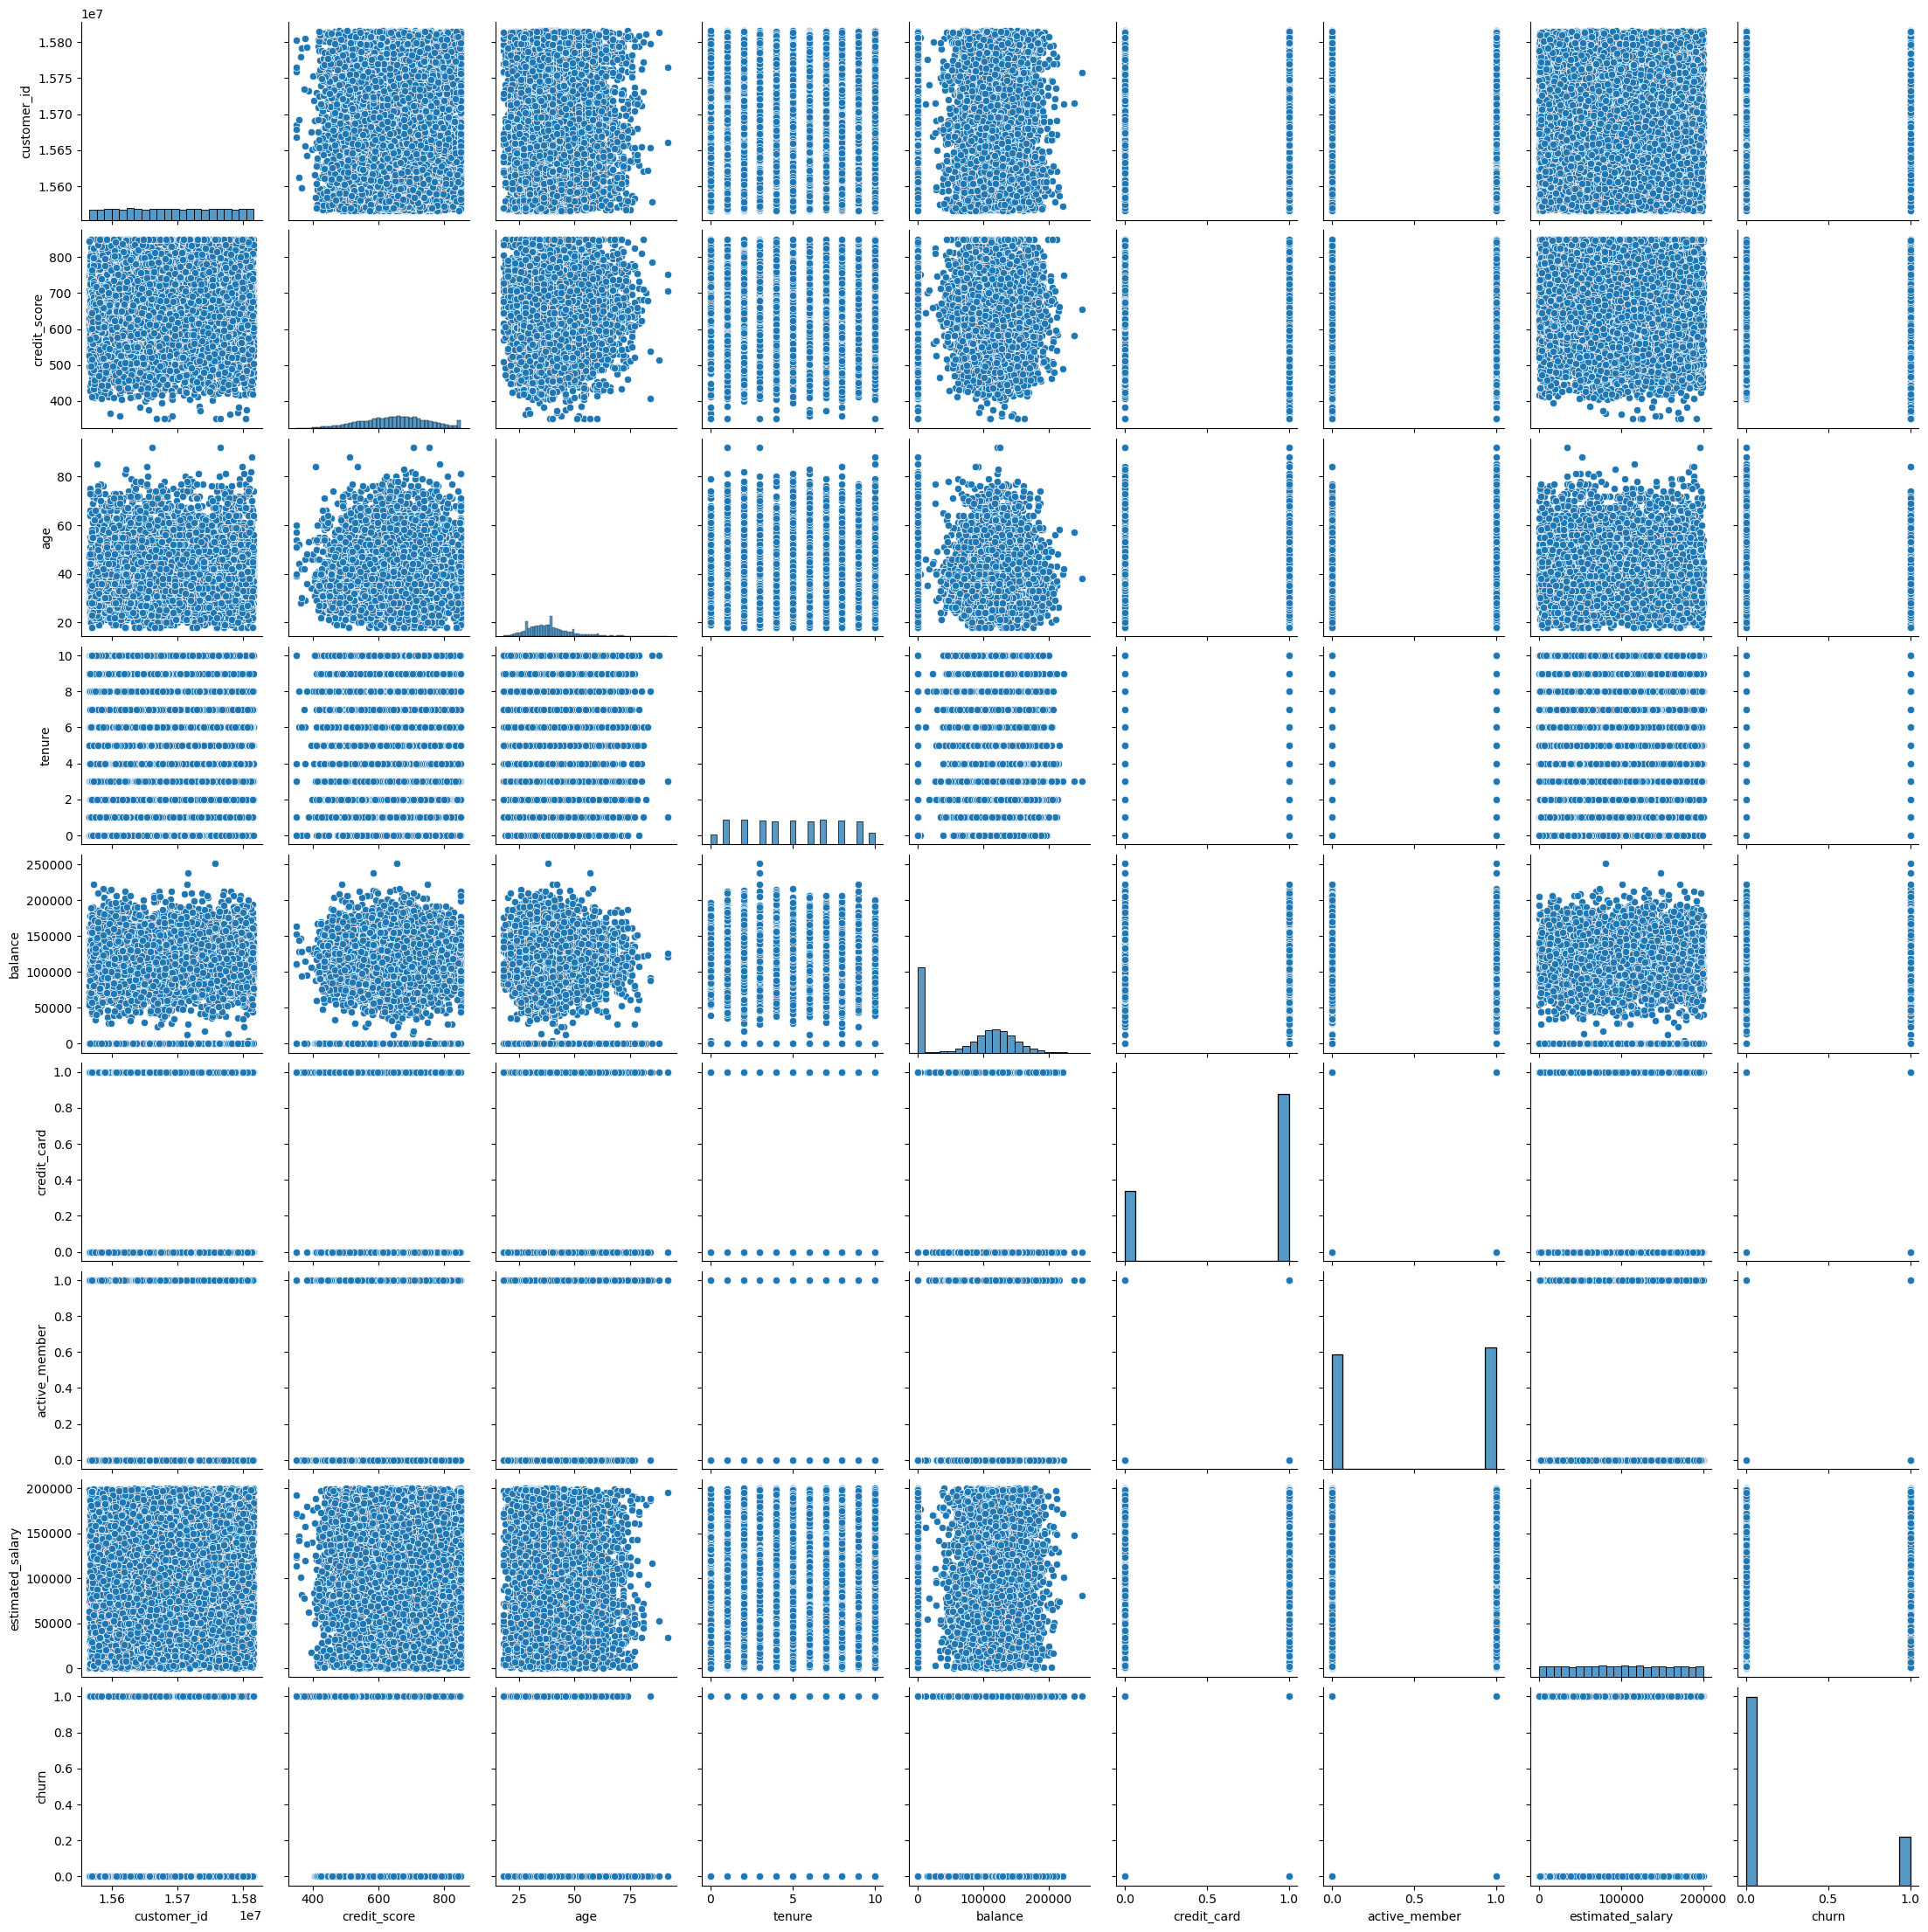

In [13]:
plt.figure(figsize=[12,10])
sns.pairplot(df);

<AxesSubplot:>

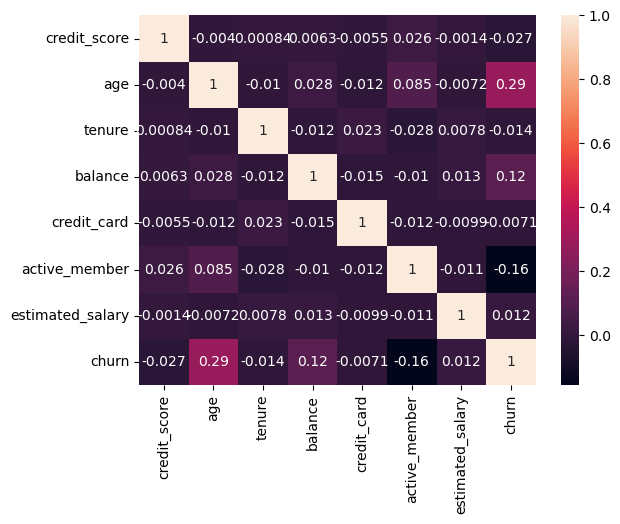

In [14]:
sns.heatmap(data= df.corr(), annot=True)

from the heatmp, it shows a good amount of correlation between age and churn, and also a fairly good correlation between age and activity of members, and that of churn and balance.

i will explor all these corelations

In [15]:
#fuction to group age to groups
def age(x):
    if x <= 18:
        return 'Adolescence'
    elif x <= 39:
        return 'Young Adulthood'
    elif x <= 59:
        return 'Middle Adulthood'
    else:
        return 'Late Adulthood'
    
df['age_category'] = df['age'].apply(age)

Text(0.5, 1.0, 'gender differences')

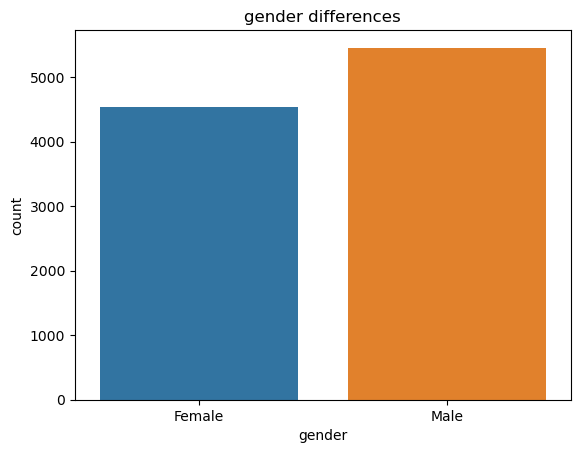

In [16]:
sns.countplot(x=df['gender'])
plt.title('gender differences')

from the gender groups, male seem to be more than female, but which of the two has more churns?

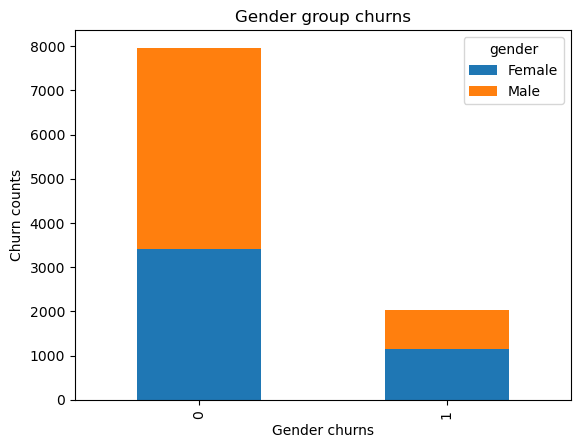

In [17]:
b = df.groupby(['churn'])['gender'].value_counts()
b.unstack().plot(kind='bar', stacked=True)

plt.xlabel('Gender churns')
plt.ylabel('Churn counts')
plt.title('Gender group churns')
plt.legend(title='gender')

plt.show()

In [18]:
b

churn        
0      Male      4559
       Female    3404
1      Female    1139
       Male       898
Name: gender, dtype: int64

well from the result it shows that females churn the most, how about age groups?

Text(0.5, 1.0, 'Number of Age categories')

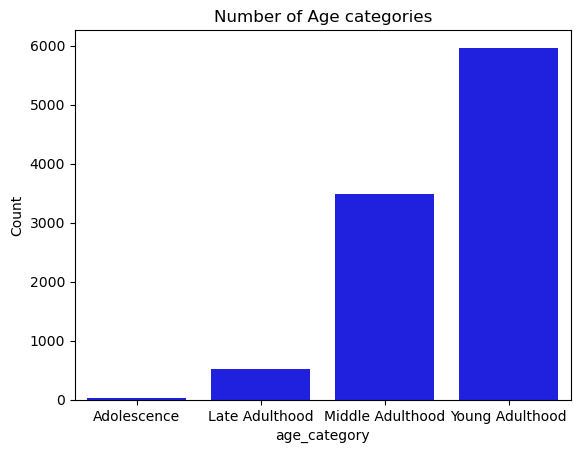

In [19]:
x = pd.DataFrame(df.groupby('age_category').age_category.count().sort_values())

sns.barplot(data= x, x= x.index, y= 'age_category', color='b')
plt.ylabel('Count')
plt.title('Number of Age categories')

In [20]:
x

,age_category
age_category,
Adolescence,22
Late Adulthood,526
Middle Adulthood,3487
Young Adulthood,5965


from the finding, the most dominant age group is fro 19 - 39 i.e young adulthood followed by 40 - 59 i.e middle adulthood, i will check which of these age groups churn most

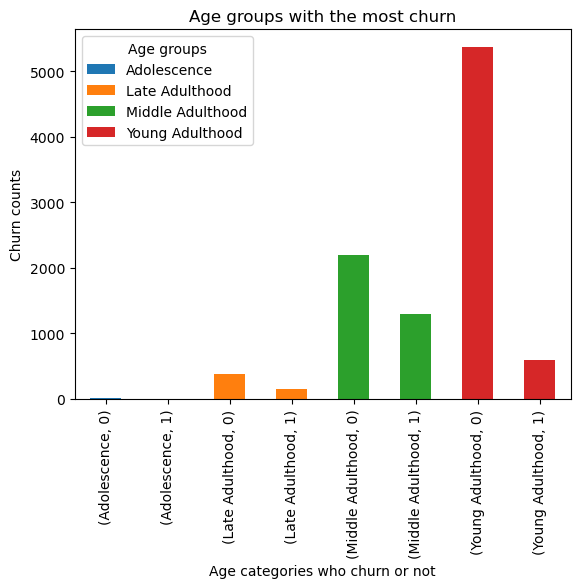

In [21]:
x = df.groupby(['age_category', 'churn'])['age_category'].value_counts()
# unstack the count series and plot as a stacked bar plot
x.unstack().plot(kind='bar', stacked=True)

plt.xlabel('Age categories who churn or not')
plt.ylabel('Churn counts')
plt.title('Age groups with the most churn')
plt.legend(title='Age groups')

plt.show()

In [22]:
x

age_category      churn  age_category    
Adolescence       0      Adolescence           20
                  1      Adolescence            2
Late Adulthood    0      Late Adulthood       379
                  1      Late Adulthood       147
Middle Adulthood  0      Middle Adulthood    2194
                  1      Middle Adulthood    1293
Young Adulthood   0      Young Adulthood     5370
                  1      Young Adulthood      595
Name: age_category, dtype: int64

from the charts and reults, it shows that the middle age group churn the most from all other age groups, there could be several reasons why this happens

- Career Plateau: Middle-aged employees may have been with the organization for a while and may have reached a plateau in their careers. They may feel like they have hit a ceiling in terms of opportunities for advancement, and may become bored or disillusioned with their work.

- Family Responsibilities: Middle-aged employees may be juggling significant family responsibilities, such as caring for children or aging parents. These responsibilities can be challenging to balance with work demands, and may make them more likely to leave an organization if they feel that their work is interfering with their personal life.

- Health Issues: Middle-aged employees may be more prone to health issues that can affect their ability to work. For example, they may develop chronic health conditions that make it difficult to maintain a full-time job. If their employer is not able to provide the necessary support, such as flexible work arrangements or accommodations, they may choose to leave the organization.

- Generational Differences: Middle-aged employees may feel like they don't fit in with the younger or older generations of employees in the organization. This can create feelings of isolation or disconnection, and may lead them to seek employment elsewhere.

- Lack of Job Satisfaction: Middle-aged employees may have higher expectations for job satisfaction and fulfillment, and may be less willing to tolerate a job that doesn't meet those expectations. If they feel like their work is not meaningful or fulfilling, they may be more likely to leave the organization.

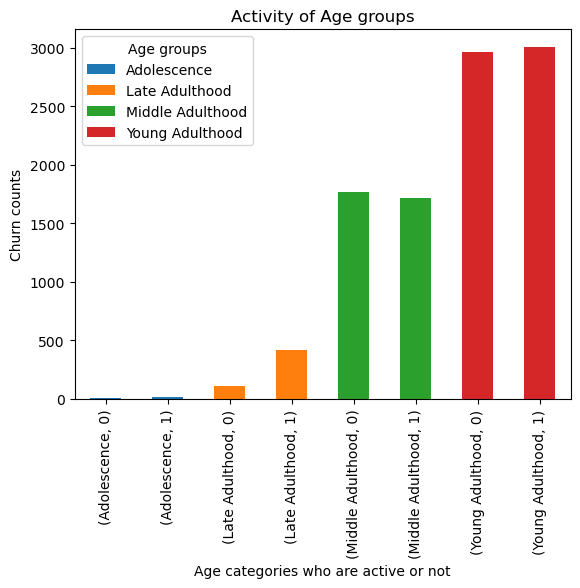

In [23]:
x = df.groupby(['age_category', 'active_member'])['age_category'].value_counts()

# unstack the count series and plot as a stacked bar plot
x.unstack().plot(kind='bar', stacked=True)

plt.xlabel('Age categories who are active or not')
plt.ylabel('Churn counts')
plt.title('Activity of Age groups')
plt.legend(title='Age groups')

plt.show()

In [24]:
x

age_category      active_member  age_category    
Adolescence       0              Adolescence            9
                  1              Adolescence           13
Late Adulthood    0              Late Adulthood       111
                  1              Late Adulthood       415
Middle Adulthood  0              Middle Adulthood    1769
                  1              Middle Adulthood    1718
Young Adulthood   0              Young Adulthood     2960
                  1              Young Adulthood     3005
Name: age_category, dtype: int64

there isn't that much difference in the ratio of in activity for almost all age groups whether the active or non-active, howerver, for that of late_adulthood we see a really good number of them that are not active compared tho those who are and this makes perfect sense because since they are in their old age they won't want to engage in a lot of activities like those in their early and middle age. 

next, i will explore how balance relates with churns

In [25]:
#function to categorize balance 
# Define the thresholds for high, mid, and low balance
high_threshold = df['balance'].quantile(0.75)
mid_threshold = df['balance'].quantile(0.5)
low_threshold = df['balance'].quantile(0.25)

# Define a function to categorize the balance column
def categorize_balance(balance):
    if balance >= high_threshold:
        return 'high'
    elif balance >= mid_threshold:
        return 'mid'
    else:
        return 'low'

# Create a new column called balance_category by applying the categorize_balance function to the balance column
df['balance_category'] = df['balance'].apply(categorize_balance)

In [26]:
df.groupby(['balance_category', 'churn'])['balance_category'].value_counts()

balance_category  churn  balance_category
high              0      high                1908
                  1      high                 592
low               0      low                 4212
                  1      low                  788
mid               0      mid                 1843
                  1      mid                  657
Name: balance_category, dtype: int64

although not much, the number of people who churn more seem to generally have low balance
now i will build a model for my predictions

In [27]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn', 'age_category', 'balance_category'],
      dtype='object')

In [28]:
X = df[['credit_score','age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']]
y = df['churn']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0, max_features=3, min_samples_split=10)

dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_features=3, min_samples_split=10, random_state=0)

In [32]:
dtc_pred = dtc.predict(X_test)

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, dtc_pred))
print('\n')
print(confusion_matrix(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1577
           1       0.57      0.47      0.51       423

    accuracy                           0.81      2000
   macro avg       0.72      0.69      0.70      2000
weighted avg       0.80      0.81      0.81      2000



[[1427  150]
 [ 225  198]]


for the single tree, we got a pretty low evaluation of the model and the model makes plenty of type 1  and two error so i will try to use a different algorithm to design my model

In [34]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [35]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [36]:
predictions = logmodel.predict(X_test)

In [37]:
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88      1577
           1       0.36      0.05      0.08       423

    accuracy                           0.78      2000
   macro avg       0.58      0.51      0.48      2000
weighted avg       0.70      0.78      0.71      2000



[[1542   35]
 [ 403   20]]


for this model i used a logistic reg model but it turned out to produce a huge type 1 error but a low type 2, my aim is to minimize both as much as possible

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300, max_features=2, min_samples_split=10)

In [39]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=2, min_samples_split=10, n_estimators=300)

In [40]:
predictions = rfc.predict(X_test)

In [41]:
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1577
           1       0.81      0.48      0.61       423

    accuracy                           0.87      2000
   macro avg       0.84      0.73      0.76      2000
weighted avg       0.86      0.87      0.85      2000



[[1529   48]
 [ 218  205]]


In [42]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=rfc, n_estimators=100, random_state=42)

ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

In [43]:
print(classification_report(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1577
           1       0.83      0.45      0.59       423

    accuracy                           0.86      2000
   macro avg       0.85      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



[[1537   40]
 [ 231  192]]
